In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(y_train.shape,y_test.shape,x_train.shape,x_test.shape)

(60000, 1) (10000, 1) (60000, 28, 28, 1) (10000, 28, 28, 1)


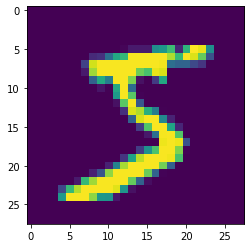

In [6]:
plt.imshow(x_train[0].reshape(28,28))

In [7]:
y_train[0]

array([5], dtype=uint8)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [11]:
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D(2,2),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=10,activation='sigmoid'),
])

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping()

In [14]:
model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test,y_test),callbacks=[early])

Epoch 1/20
469/469 [==============================] - 38s 81ms/step - loss: 0.2115 - accuracy: 0.9351 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 2/20
469/469 [==============================] - 40s 85ms/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0394 - val_accuracy: 0.9862
Epoch 3/20
469/469 [==============================] - 39s 84ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0529 - val_accuracy: 0.9827


In [15]:
loss, accuracy = model.evaluate(x_test,y_test)
print('Loss : ',loss)
print('Accuracy : ',accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0529 - accuracy: 0.9827
Loss :  0.05286112800240517
Accuracy :  0.982699990272522


[7]


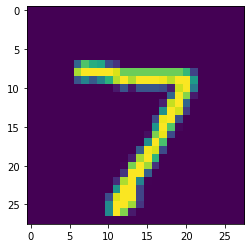

[2]


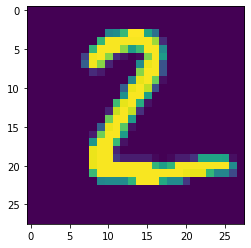

[1]


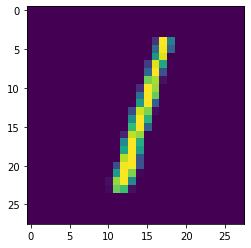

[0]


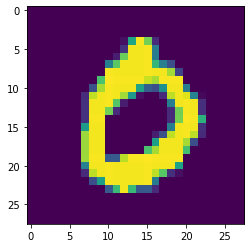

[4]


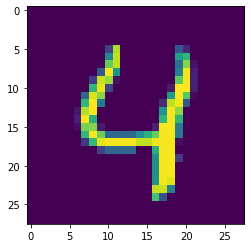

In [38]:
import random 
ran = random.randint(0,len(x_test))
my_number = x_test[0:5]
for i in my_number:
    plt.imshow(i.reshape(28,28))
    print(model.predict_classes(i.reshape(1,28,28,1)))
    plt.show()

In [24]:
model.save('./mnist.h5')

In [26]:
import tensorflow
model = tensorflow.keras.models.load_model('./mnist.h5')

In [29]:
model.predict_classes(x_test[0:3].reshape(x_test[0:3].shape))

array([7, 2, 1], dtype=int64)